In [27]:
#model related imports
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras.optimizers
# data related imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from  random import randint
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from keras.utils.vis_utils import plot_model
from sklearn import metrics


In this example, we generate random data to imaginary medical trials on an imaginary treatment. we are creating the following scenario

There are two categories using this medicine- the first category is young people ( 13-64), the second category is older people (65-100).
We are creating the data in that 5% of young people who tested the medicine has shown side effects, and 95% did not experience any side effects. in contrast, 95% of older people who tested the medicine has experienced side effects, and 5% did not experience side effects

In [55]:
#creating the train data
train_sample=[] # empty traind arrays to save the generated data 
train_Label=[]

for i in range(20):
  random_young= randint(13,64)
  train_sample.append(random_young)
  train_Label.append(1)
#the 10% older individuals who did not display side effects 
  random_older= randint(65,100)
  train_sample.append(random_older)
  train_Label.append(0)

for i in range(200):
  random_young= randint(13,64)
  train_sample.append(random_young)
  train_Label.append(0)
  
#the 90% older individuals who did  display side effects 

  random_older= randint(65,100)
  train_sample.append(random_older)
  train_Label.append(1)


The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

In [56]:
#creating the numpy arrays
train_sample=np.array(train_sample)
print (' the shape of the train sample is: ')
print(train_sample.shape) # debug 
train_Label=np.array(train_Label)



 the shape of the train sample is: 
(440,)


In machine learning tasks it is common to shuffle data and normalize it. The purpose of normalization is clear (for having same range of feature values). But, after struggling a lot, I did not find any valuable reason for shuffling data.

In [57]:
#shuffle  the data- One of the easiest ways to shuffle is to use the numpy shaffel method 

train_sample,lable_sample=shuffle(train_sample,train_Label)

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [58]:
#normalising the data or standarising it to make the fit function more effecient or quicker. 
scaler= MinMaxScaler(feature_range=(0,1)) # creating feature range then used to scale the data below 
scaled_train_samples= scaler.fit_transform(train_sample.reshape(-1,1))  # the fit function dosent accept one d data this is why we had to re shape it to 2 d 

The following line is saving the generated data into a text file- this is an extra not necessary step just in case you want to practice the same example using CSV files instead of generating the data every time

savetxt() Python's Numpy module provides a function to save numpy array to a txt file with custom delimiters and other custom options i.e. numpy. savetxt(fname, arr, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)

In [60]:
eaderlist=['age','label','diabetes']
matrix= np.column_stack((train_sample, train_Label))

np.savetxt('trainFile.csv',matrix,delimiter=",", header= 'age,label', fmt='%d')

The following basic deep learning architecture has a fixed input size, and this acts as a blocker in scenarios where the input size is not fixed. Also, the decisions made by the model were based on the current input with no memory of the past. 

In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks.

In [61]:
#model structure
model= Sequential([
                   Dense(units=16, input_shape=(1,), activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=2, activation='softmax')
                               
                    ])

What is Model Summary ()
Model summary. The model summary table reports the strength of the relationship between the model and the dependent variable. R, the multiple correlation coefficient, is the linear correlation between the observed and model-predicted values of the dependent variable. Its large value indicates a strong relationship.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                32        
                                                                 
 dense_11 (Dense)            (None, 64)                1088      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 9,570
Trainable params: 9,570
Non-trainable params: 0
_________________________________________________________________


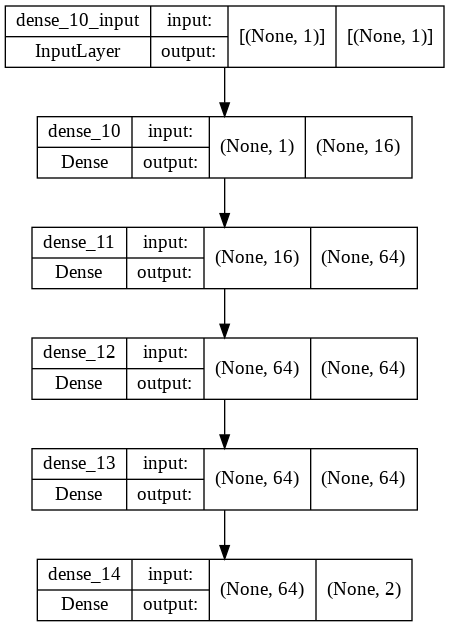

In [62]:
model.summary()
plot_model(model=model,show_shapes= True)

Compile defines the loss function, the optimizer and the metrics. That's all. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights. Fitting refers to adjusting the parameters in the model to improve accuracy.

In [63]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])

Model fitting is the measure of how well a  model generalizes data similar to that with which it was trained. 
x	
Vector, matrix, or array of training data (or list if the model has multiple inputs). If all inputs in the model are named, you can also pass a list mapping input names to data. x can be NULL (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors).

y	
Vector, matrix, or array of target (label) data (or list if the model has multiple outputs). If all outputs in the model are named, you can also pass a list mapping output names to data. y can be NULL (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors).

batch_size	
Integer or NULL. Number of samples per gradient update. If unspecified, batch_size will default to 32.

epochs	
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

verbose	
Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).
the suffel you can remove and because it is set to TRUE by default

In [64]:
model.fit(x=scaled_train_samples,y=train_Label, batch_size=10, epochs=50, shuffle =True,verbose=0)


in the next sections, we are creating, normalising, shuffling  and scaling our test data in a similar manner of the train data 

In [66]:
#creat the testing data
test_sample=[]
test_Label=[]


for i in range(20):
  random_young= randint(13,64)
  test_sample.append(random_young)
  test_Label.append(1)
 
#the 10% older individuals who did not display side effects 
  random_older= randint(65,100)
  test_sample.append(random_older)
  test_Label.append(0)


for i in range(200):
  random_young= randint(13,64)
  test_sample.append(random_young)
  test_Label.append(0)
 
  
#the 90% older individuals who did  display side effects 

  random_older= randint(65,100)
  test_sample.append(random_older)
  test_Label.append(1)


In [69]:
test_lables= np.array(test_Label)
test_sample= np.array(test_sample)

test_sample,test_lables= shuffle(test_lables,test_sample)

In [70]:
scaleed_test_sample= scaler.fit_transform(test_sample.reshape(-1,1))

the next step the creating a prediction- A good model fit refers to a model that accurately approximates the output when it is provided with unseen inputs. 

In [71]:
prediction= model.predict(x=scaleed_test_sample, batch_size=10, verbose=0)

Argmax is an operation that finds the argument that gives the maximum value from a target function. Argmax is most commonly used in machine learning for finding the class with the largest predicted probability

In [72]:
rounde_predict= np.argmax(prediction, axis= -1)
rounde_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

The following line is saving the generated predicted lables with the true lables into a text file- this is an extra not necessary step just in case you want to practice the same example using CSV files instead of generating the data every time

In [73]:

headerlist=['predicated_label','label',]
matrix= np.column_stack((rounde_predict, test_Label,))

np.savetxt('predictionFile.csv',matrix,delimiter=",", header= 'predicated_label,label', fmt='%d')

In [74]:
#evaluate accuracy you need a vector of labels.

cm= metrics.confusion_matrix(rounde_predict,test_Label)
cm

array([[115, 105],
       [105, 115]])

Text(0.5, 1.0, 'Confusion medical trial for randomly generated data')

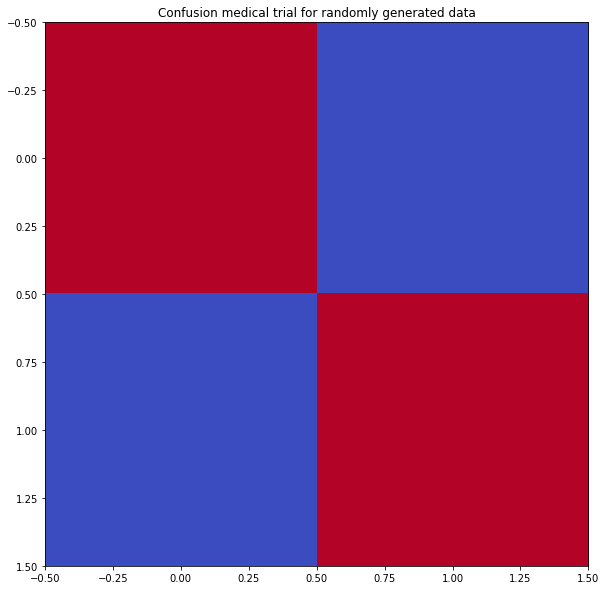

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='coolwarm')
plt.title( 'Confusion medical trial for randomly generated data')


#Anvil

Now let us look in to how we can deploy our note book to a simple web page. where we can upload a file and predict its lable. 

## Anvil function
you first need tocreat anviled account- aanvild will create a seAnvil uplink it will connect to your could server whcih can run your notebook on your device or where it is saved
 
you will need to pip install the Anvil  process
creat anvil function on your note book 
creat the anvile user interface and call your function from there. 

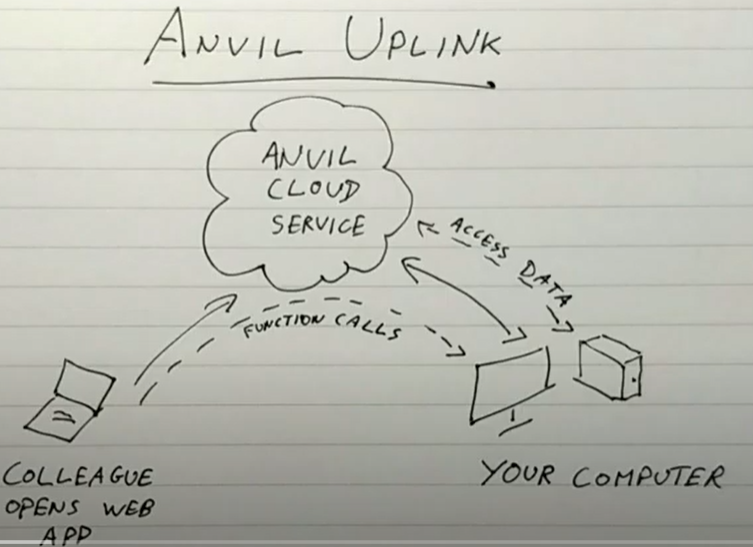

In [ ]:
pip install anvil-uplink # installing anvil package - 

In [76]:

import anvil.server

anvil.server.connect("GEAN4P5DTQ345X2ANZ6PMLP2-2NNLTXLWWEA4WNSC") ## the number here should be generated for you in your anvild project
# adding your uplink to your notebook 


In [77]:
import anvil.media
@anvil.server.callable # adding your anvild call back with out this Anivil will not recongnize your function as a callback function 
def predict_side_effect(Age):
  Age= np.array(Age)
  Age= scaler.fit_transform(Age.reshape(-1,1))
  prediction1= model.predict(x=Age, batch_size=10, verbose=0)
  rounde_predict1= np.argmax(prediction1, axis= -1)
  return('side effect is likly for this person' if rounde_predict1 > 0.5 else 'side effect is not likly', float(rounde_predict1))

  


In [82]:
predict_side_effect(10)

('side effect is not likly', 0.0)

In Anvild you need to create a simple page with one file uploader and image object also a text lable to view the prediction 

the following code goes in to your uploader object: Note that you might need to adjuste it a bit.




```
from ._anvil_designer import Form1Template
from anvil import *
import anvil.server

class Form1(Form1Template):

  def __init__(self, **properties):
    # Set Form properties and Data Bindings.
    self.init_components(**properties)

    # Any code you write here will run when the form opens.

  def button_1_click(self, **event_args):
    """This method is called when the button is clicked"""
    # Call the google colab function and pass it the iris measurements
    prediction_side = anvil.server.call('predict_side_effect', self.Age.text)
    # If a category is returned set our species 
    if prediction_side:
      self.Prediction.visible = True
      self.Prediction.text = prediction_side
    pass



    

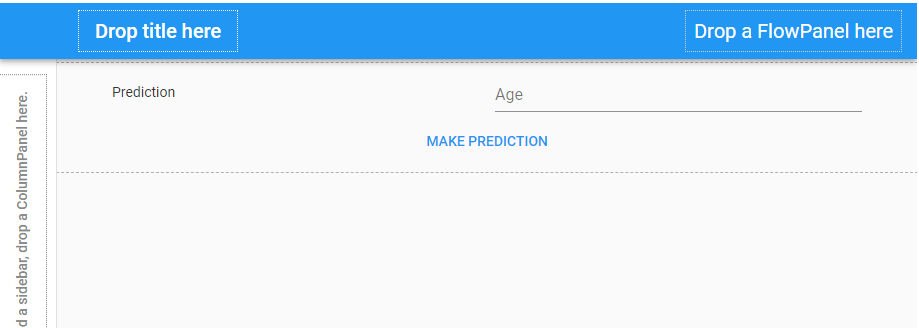

In [ ]:
anvil.server.wait_forever()
### Finally, let's add `anvil.server.wait_forever()` function so the notebook is always available to the web app: